In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [7]:
dataset = pd.read_csv("linear_regression_dataset.csv")

In [8]:
df = pd.DataFrame(dataset)
df.head(20)

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Height   15 non-null     float64
 1   Weight   15 non-null     float64
dtypes: float64(2)
memory usage: 372.0 bytes


In [10]:
df.columns = df.columns.str.strip()

In [11]:
# Taking feature and target variable separately
X = df[['Height']].values
y = df[['Weight']].values

In [12]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [13]:
# Get the coefficient and intercept
slope = model.coef_[0]
intercept = model.intercept_

In [14]:
import matplotlib.pyplot as plt

In [15]:
# predicting values using sk learn model
y_pred = model.predict(X)

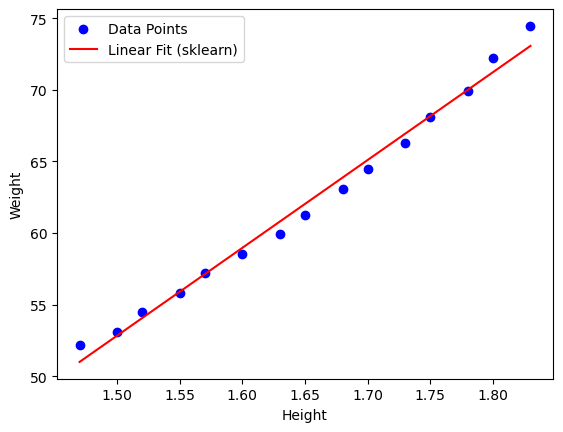

Sklearn Model: Slope = [61.27218654], Intercept = [-39.06195592]


In [16]:
# Print the coefficient obtained from linear regression and plot a straight line on the scatter plot

plt.scatter(X,y,color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label=f'Linear Fit (sklearn)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()
print(f"Sklearn Model: Slope = {slope}, Intercept = {intercept}")

#### Implementing linear regression

Without using the inbuilt library

In [17]:
# creating linear regression class to find the fit, Coefficient & intercept
class LinearRegression_manual:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    # Function to fit the line between x and y
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        tol = 1e-5
        prev_loss = 0
        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * (np.dot(X.T, (y_pred - y)))
            db = (1/n_samples) * (np.sum(y_pred - y))
            self.weights = self.weights - (self.lr * dw)
            self.bias = self.bias - (self.lr * db)
            
            current_loss = np.mean(np.square(y_pred - y))
            
            if abs(current_loss - prev_loss) < tol:
                break
                
            prev_loss = current_loss
        
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def get_coefficients(self):
        """Returns the coefficients (weights) of the model."""
        return self.weights
    
    def get_intercept(self):
        """Returns the intercept (bias) of the model."""
        return self.bias

In [18]:
LinearRegression_manual = LinearRegression_manual()

In [19]:
LinearRegression_manual.fit(X, y)

In [ ]:
# Print the coefficient obtained from linear regression and plot a straight line on the scatter plot

plt.scatter(X,y,color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label=f'Linear Fit (sklearn)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()
print(f"Sklearn Model: Slope = {slope}, Intercept = {intercept}")

In [22]:
print(LinearRegression_manual.get_coefficients())

print(LinearRegression_manual.get_intercept())

[6.35930508 6.35930508 6.35930508 6.35930508 6.35930508 6.35930508
 6.35930508 6.35930508 6.35930508 6.35930508 6.35930508 6.35930508
 6.35930508 6.35930508 6.35930508]
51.6432276356347
